<a href="https://colab.research.google.com/github/yaakoubiIheb/Steganography/blob/main/steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O image.png "http://r0k.us/graphics/kodak/kodak/kodim07.png"

--2023-05-05 12:44:41--  http://r0k.us/graphics/kodak/kodak/kodim07.png
Resolving r0k.us (r0k.us)... 174.127.119.148
Connecting to r0k.us (r0k.us)|174.127.119.148|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://r0k.us/graphics/kodak/kodak/kodim07.png [following]
--2023-05-05 12:44:41--  https://r0k.us/graphics/kodak/kodak/kodim07.png
Connecting to r0k.us (r0k.us)|174.127.119.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566322 (553K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>] 553.05K  1.79MB/s    in 0.3s    

2023-05-05 12:44:42 (1.79 MB/s) - ‘image.png’ saved [566322/566322]



In [ ]:
!pip install cryptography

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from cryptography.fernet import Fernet

In [ ]:
from PIL import Image

imgName = "image.png"
imgSecretName = "imgWithSecret.png"

In [ ]:
def getDataBits(data):
  bits = []
  for byte in data:
    for b in range(0,8):
      bits.append((byte >> b) & 0b1)
  
  return bits

In [ ]:
# This function takes the data, and puts it inside the image, 1 bit per color value
def putDataInsideImage(im, data): # Note that this function has not been implemented to save 2 or nbits per value, but the changes needed are minimal
  dataBits = getDataBits(data)

  maxX = im.size[0] # width of the image
  maxY = im.size[1] # height of the image
  maxC = len(im.getpixel((0,0))) # number of channels in the image

  x = 0 # x coordinate of the pixel
  y = 0 # y coordinate of the pixel
  c = 0 # color channel of the pixel

  for bit in dataBits:
    if x >= maxX or y >= maxY:
      print("Not enough pixels to put the data in!") # If the ammount of data is too large, we might run out of pixels
      break

    color = list(im.getpixel((x,y)))
    color[c] = (color[c] & (~0b1)) | bit;
    #color[c] = (color[c] & (~(0b1 << 7))) | (bit << 7); # Saving on the most significant bit, notice how we can notice the changes in the image
    im.putpixel((x,y), tuple(color)) 

    c = c + 1 # we first iterate through the color channel
    if c >= maxC:
      c = 0
      x = x + 1 # then through the x coordinate
      if x >= maxX:
        x = 0
        y = y + 1 # and finally through the y coordinate
        if y >= maxY:
          print("Not enough pixels!")
          return

        # knowing the order in which we save the bits is important when recovering the data from the image

# This function does the same as putDataInsideImage, but adds 4 bytes at the start of the data describing the size, so when we are taking the data out of the picture we know where it ends
import struct
def putDataInsideImageWithSize(im, data):
  data = list(data)
  data[0:0] = struct.pack("=L", len(data)) # insert 4 bytes at the start of the data that specify the ammount of data in number of bytes, the pack function takes the number and returns the bytes representing the number
  putDataInsideImage(im, bytes(data))

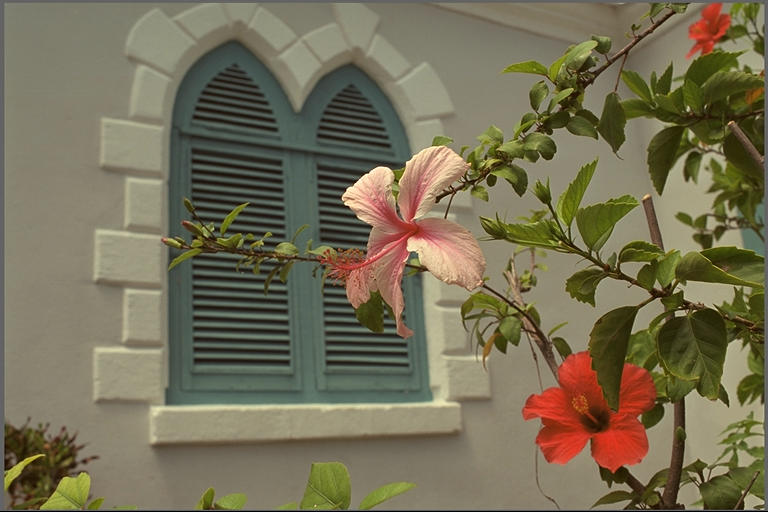

In [ ]:
im = Image.open(imgName)
im

In [ ]:
message="this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image "

In [ ]:

key = Fernet.generate_key()

def encrypt_text(text,key):
  # Instance the Fernet class with the key
 
  fernet = Fernet(key)
 
# then use the Fernet class instance
# to encrypt the string string must
# be encoded to byte string before encryption
  return fernet.encrypt(text.encode())



def decrypt_text(text,key):
  # Instance the Fernet class with the key
 
  fernet = Fernet(key)
  # decrypt the encrypted string with the
# Fernet instance of the key,
# that was used for encrypting the string
# encoded byte string is returned by decrypt method,
# so decode it to string with decode methods
  return fernet.decrypt(text).decode()
 

#secretText=encrypt_text(message,key).encode('ascii')
secretText=encrypt_text(message,key)


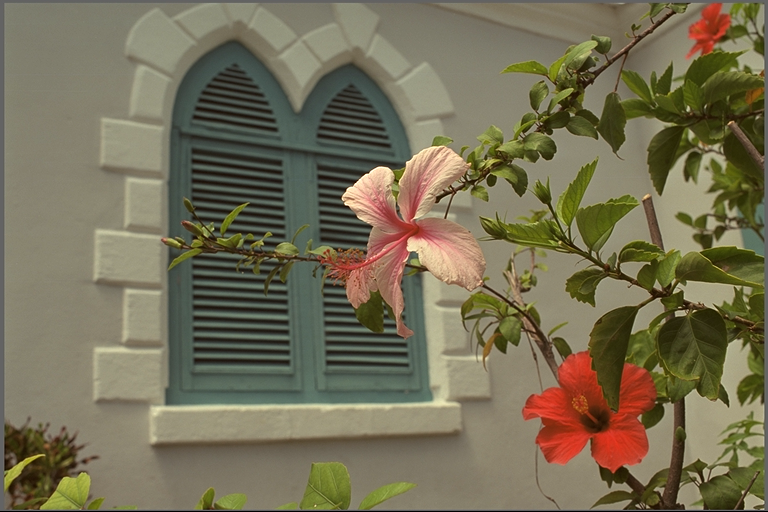

In [ ]:
putDataInsideImageWithSize(im, secretText)
im.save(imgSecretName)
im # we show the image, notice how the change is unnoticeable

In [ ]:
# Now recover data from the image

# This function does the same as the above but we can specify how many bits to read
def getBitsFromImage(im, maxBits = 0):
  bits = []

  maxC = len(im.getpixel((0,0)))
  for y in range(0, im.size[1]):
    for x in range(0, im.size[0]):
      for c in range(0, maxC):
        bits.append(im.getpixel((x,y))[c] & 0b1)
        if maxBits is not 0 and len(bits) >= maxBits:
          return bits

  return bits


<>:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-11-b3f8753e67b5>:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if maxBits is not 0 and len(bits) >= maxBits:


In [ ]:
# This function takes a list with bits, and converts it to a list of bytes by taking 8 bits of the list to create 1 byte
def bitsToBytes(dataBits): # This function hasn't been implemented for groups of bits, but the changes needed to implement it are minimal
  dataBytes = []
  for i in range(0, len(dataBits), 8):
    if i+7 >= len(dataBits):
      break
    
    currByte = 0
    for b in range(0, 8):
      currByte = currByte | (dataBits[i + b] << b)

    dataBytes.append(currByte)

  return(bytes(dataBytes))

  

def getDataFromImageWithSize(im):
  dataSizeBits = getBitsFromImage(im, 4*8) # get first 4 bytes, the length of the data
  dataSize = struct.unpack("=L", bitsToBytes(dataSizeBits))[0] # unpack takes the 4 bytes and returns the number represented by those 4 bytes
  dataBits = getBitsFromImage(im, 4*8 + dataSize*8) # get all the data, the total ammount of data is the 4 bytes of the number with the data size, plus the actual data size
  return bitsToBytes(dataBits)[4:] # return only from the 4'th byte to the end, because the first 4 bytes are the size of the data

In [ ]:
#example of saving into a file
imO = Image.open(imgSecretName)
with open('secretText', "w") as dataFile: # Note that we open in binary mode
  dataFile.write(decrypt_text(getDataFromImageWithSize(imO).decode(),key))

In [ ]:
#getting the text 
imO = Image.open(imgSecretName)
decrypt_text(getDataFromImageWithSize(imO).decode(),key)


'this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the text that i will hide in the image this is the 